# **Capstone : Sentiment Based Product Recommendation System**

**Problem Statement** : 
Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

Need to build a sentiment-based product recommendation system, which includes the following tasks.

1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

In [ ]:
#importing basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



###**Data sourcing and sentiment analysis**
---
1. Exploratory data analysis


In [ ]:
#Mounting GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
prod_data=pd.read_csv(r"/content/gdrive/MyDrive/Capstone/sample30.csv")
#prod_data=pd.read_csv(r"/content/drive/MyDrive/Capstone/sample30.csv")
prod_data.shape

(30000, 15)

In [ ]:
#Increasing column width for readign the entire text 
pd.set_option('max_colwidth', None)
prod_data.head(3)

id            brand  ... reviews_username user_sentiment
0  AV13O1A8GV-KLJ3akUyj  Universal Music  ...           joshua       Positive
1  AV14LG0R-jtxr-f38QfS         Lundberg  ...        dorothy w       Positive
2  AV14LG0R-jtxr-f38QfS         Lundberg  ...        dorothy w       Positive

[3 rows x 15 columns]

In [ ]:
#Reading the column name defination for better understanding the data 
data_def=pd.read_csv(r"/content/gdrive/MyDrive/Capstone/DataAttributeDescription.csv",encoding="iso-8859-1")
print(data_def.shape)
data_def = data_def.style.set_properties(**{'text-align': 'left'})
display(data_def)

(15, 2)


In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
prod_data.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [ ]:
#Checking the unique items in the dataframe
prod_data.nunique()

id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64

Lets have a look at the frequency distribution of ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


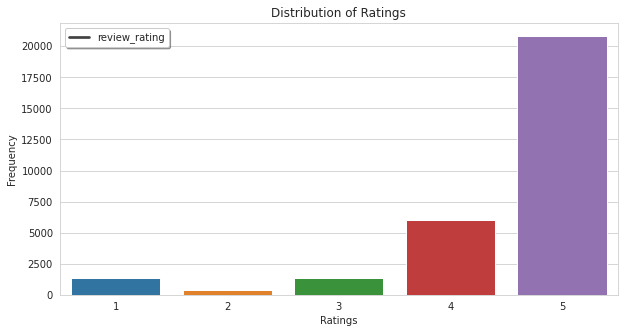

In [ ]:
plt.figure(figsize=[10,5])
x=list(prod_data['reviews_rating'].value_counts().index)
y=list(prod_data['reviews_rating'].value_counts())
sns.set_style(style='whitegrid')
sns.barplot(x,y,data=prod_data)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.legend(['review_rating'],shadow=True,loc=2)

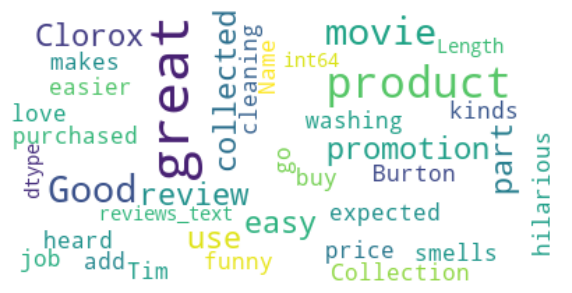

In [ ]:
#Ploting the distribution of differnet word in graphical manner by using word cloud
from wordcloud import WordCloud,STOPWORDS
stopword=set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopword, max_words=300, max_font_size=40, scale=1, random_state=2).generate(str(prod_data['reviews_text'].value_counts()))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

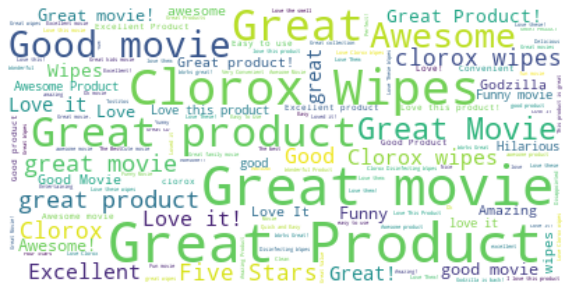

In [ ]:
wordcloud = WordCloud(background_color='white', stopwords=stopword, max_words=300, max_font_size=40, scale=1, random_state=1).generate_from_frequencies(prod_data['reviews_title'].value_counts())
plt.figure(figsize=[10,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Removing unnecessary columns

In [ ]:
data=prod_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
data.drop(['id','brand','categories','manufacturer','name','reviews_date','reviews_didPurchase','reviews_doRecommend','reviews_userCity','reviews_userProvince','reviews_username'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  30000 non-null  int64 
 1   reviews_text    30000 non-null  object
 2   reviews_title   29810 non-null  object
 3   user_sentiment  29999 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [ ]:
data['reviews_title']=data['reviews_title'].fillna(" ")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  30000 non-null  int64 
 1   reviews_text    30000 non-null  object
 2   reviews_title   30000 non-null  object
 3   user_sentiment  29999 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [ ]:
data.user_sentiment.value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [ ]:
data['user_sentiment']=data['user_sentiment'].fillna('Positive')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  30000 non-null  int64 
 1   reviews_text    30000 non-null  object
 2   reviews_title   30000 non-null  object
 3   user_sentiment  30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [ ]:
data.user_sentiment.value_counts()

Positive    26633
Negative     3367
Name: user_sentiment, dtype: int64

Concatting two text field and removing the individual columns after concat

In [ ]:
data['reviews']=data['reviews_title']+' '+data['reviews_text']

In [ ]:
data.drop(['reviews_title','reviews_text'],axis=1,inplace=True)

In [ ]:
#Importing and installing the some other libraraies and packages for building the model
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from collections import Counter
import pickle
import string
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Removing punctuations and stopwords as these are not required

In [ ]:
#Remove punctuations
def remove_punctuations(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

#Remove stopwords
def remove_stopwords(text):
  words=text.split(' ')
  present_stopwords=stopwords.words('english')
  stopwords_dict=Counter(present_stopwords)
  text=" ".join([x for x in words if x not in stopwords_dict])
  return text

In [ ]:
#applying removing punctuations funtion
data['reviews']=data['reviews'].apply(remove_punctuations)

In [ ]:
data['reviews']=data['reviews'].apply(remove_stopwords)

Applying lemmatization using WordNetLemmatizer as a necessary step in data preprocessing

In [ ]:
#Lemmatization
def get_lemmatized_text(corpuse):
  lemmatizer=WordNetLemmatizer()
  translated_text=[' '.join([lemmatizer.lemmatize(word.lower()) for word in review.split(' ')]) for review in corpuse]
  return translated_text

In [ ]:
data['reviews']=get_lemmatized_text(data['reviews'])

###Importing required libraries for model building

In [ ]:
!pip install spellchecker
!pip install pyspellchecker

     |████████████████████████████████| 3.9 MB 5.2 MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966514 sha256=5e5a0a4210b8387e4a9c4c483ffd9554e1c9bc14733238ab238bd35229473687
  Stored in directory: /root/.cache/pip/wheels/58/e9/48/b82b733a7a0a9cc52ed239ccf082ff33e2fbda71670ddd3349
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7140 sha256=f9e7decb60818d53a989a3becfcbbddd6997bc7c6ffdb7ab56495cb17b27679c
  Stored in directory: /root/.cache/pip/wheels/3c/f3/5d/77e8983e86af1c3c62b80d76de8020f560ce6367f1b2763b40
  Created wheel for silpa-common: filename=silpa_common-0.3-py3-none-any.whl size=8482 sha256=5848271064acf8887723c82ebfc7eed05e21960e100d06219227a17e65f9babb
  Stored in directory: /root/.cache/pip/wheels/02/81/11/40ef1cf40f5c4021a214653ca3362914f0f9e14e8322f75f9b
  Created wheel for soundex: filename=soundex-1.1.3-py3-none-any.whl size=8894 sha256=be8f1f4eaa752584a62008d68df7628d05b8f8e2c77b9d5a1b13

In [ ]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from spellchecker import SpellChecker
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Method for correcting the spellings of the preprocesed text**

In [ ]:
spell=SpellChecker()
def spell_correction(text):
  corrected_text=[]
  misspelled_words=spell.unknown(text.split())
  for word in text.split():
    if(len(word)>12):
      continue
    elif word in misspelled_words:
      corrected_text.append(spell.correction(word))
    else:
      corrected_text.append(word)
  return " ".join(corrected_text)

In [ ]:
data['reviews']=data['reviews'].apply(spell_correction)

In [ ]:
data.head()

reviews_rating  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                reviews
0               5  ...                                                                                                                                                                                                                                                                                                                                            just awesome love album good hip hop side current pop sound so hype listen everyday gym give star rating way metaphor crazy
1               5  ...                                                                                                                                                                                                                                                                                                                                                                                                                  good good flavor this review collected part promotion
2               5  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                       good good flavor
3               1  ...  disappointed i read review looking buying one couple lubricant ultimately disappointed didnt even live review i read for starter neither boyfriend i could notice sort enhanced captivating sensation what notice however messy consistency reminiscent liquidy vaseline it difficult clean pleasant especially since lacked captivating sensation expecting im disappointed i paid much i lube i wont use i could use normal personal lubricant 1 le money 2 le mess
4               1  ...                                                                                                                                                                                                                                                                                                                                                            irritation my husband bought gel u the gel caused irritation felt like burning skin i wouldnt recommend gel

[5 rows x 3 columns]

In [ ]:
# Save the preprocessed data for future use
pickle.dump(data,open('/content/gdrive/MyDrive/Capstone/processed_data.pkl','wb'))

Creating features using tfidf and handling class imbalance using SMOTE

In [ ]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(data['reviews'])
X=tfidf_vectorizer.transform(data['reviews'])
y=data['user_sentiment']

#Saving the vocabulary used in tfidf vectorizer as features 
pickle.dump(tfidf_vectorizer.vocabulary_, open("/content/gdrive/MyDrive/Capstone/features.pkl","wb"))

#Split train test data
X_train,X_test, y_train,y_test=train_test_split(X,y,train_size=.75)

Class Imbalance check and method to handle it

In [ ]:
data.groupby(['user_sentiment']).count()

reviews_rating  reviews
user_sentiment                         
Negative                  3367     3367
Positive                 26633    26633

Clearly, a case of class imbalance. Hence,applying SMOTE for handling this class imbalance

In [ ]:
counter=Counter(y_train)
print("Before ",counter)

#over sampling using SMOTE
smote=SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train, y_train)

counter=Counter(y_train_sm)
print("After ",counter)

Before  Counter({'Positive': 19984, 'Negative': 2516})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After  Counter({'Positive': 19984, 'Negative': 19984})


Creating a utility method for creating confusion matrix and displaying scores

In [ ]:
def display_score(classifier):
  cm=confusion_matrix(y_test,classifier.predict(X_test))
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
  disp.plot()

  print(classifier)
  print("\n")
  print("Accuracy is ",accuracy_score(y_test, classifier.predict(X_test)))
  print("Sensitivity is {}".format(cm[1][1]/sum(cm[1])))
  print("Specificity is {}".format(cm[0][0]/sum(cm[0])))

##Model 1 - Logistic Regression

Creating logistic regression models with different value of C

In [ ]:
for c in [0.01,0.05,0.25,0.5,1.0]:
  lr=LogisticRegression(C=c)
  lr.fit(X_train_sm,y_train_sm)
  cm=confusion_matrix(y_test,lr.predict(X_test))
  print("Sensitivity for C = {0} is {1}".format(c,cm[1][1]/sum(cm[1])))
  print("Specificity for C = {0} is {1}".format(c,cm[0][0]/sum(cm[0])))

Sensitivity for C = 0.01 is 0.8345615882087531
Specificity for C = 0.01 is 0.7250293772032902
Sensitivity for C = 0.05 is 0.8483982553767484
Specificity for C = 0.05 is 0.7485311398354877
Sensitivity for C = 0.25 is 0.8894570612122124
Specificity for C = 0.25 is 0.7379553466509988
Sensitivity for C = 0.5 is 0.913671228756204
Specificity for C = 0.5 is 0.717978848413631
Sensitivity for C = 1.0 is 0.9338246352835012
Specificity for C = 1.0 is 0.681551116333725


In [ ]:
final_lr=LogisticRegression(C=0.05)
final_lr.fit(X_train_sm,y_train_sm)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Displaying Confusion matrix Scores

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy is  0.8370666666666666
Sensitivity is 0.8483982553767484
Specificity is 0.7485311398354877


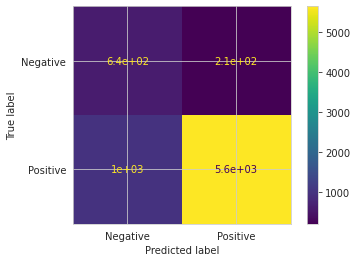

In [ ]:
#Test data performance metrics score
display_score(final_lr)

In [ ]:
feature_to_coef={
    word: coef for word,coef in zip(tfidf_vectorizer.get_feature_names(),final_lr.coef_[0])
}

print("Positive Words : ")
for best_positive in sorted(
    feature_to_coef.items(),
    key=lambda x:x[1],
    reverse=True)[:10]:
    print(best_positive) 

print("Negative Words : ")
for best_negative in sorted(
    feature_to_coef.items(),
    key=lambda x:x[1])[:10]:
    print(best_negative)

Positive Words : 
('great', 4.919755502869067)
('love', 3.5150815946743093)
('clean', 3.074314500715732)
('easy', 2.8397256093776324)
('good', 2.6177169552105077)
('best', 2.2245178562058094)
('better', 1.6070672379599187)
('really', 1.5308651525756665)
('easy use', 1.495738139736754)
('quick', 1.4069311243730507)
Negative Words : 
('bad', -1.9125023499297986)
('disappointed', -1.6276068930334369)
('horrible', -1.579611422909832)
('evil', -1.508815616975332)
('resident evil', -1.4625101594434045)
('resident', -1.4603858603898596)
('like', -1.4260637928260822)
('formula', -1.4098570162567006)
('terrible', -1.2986052093497478)
('claro this', -1.2295769465106798)


##**Model 2 - Naive Bayes**

In [ ]:
#Fitting Naive Bayer Model
nb=MultinomialNB()
nb.fit(X_train_sm, y_train_sm)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Accuracy is  0.8670666666666667
Sensitivity is 0.9011881485937735
Specificity is 0.600470035252644


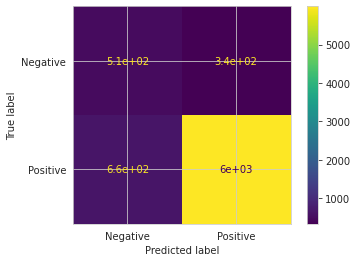

In [ ]:
display_score(nb)

##**Model 3 - Random Forest Classifier**

Fitting a Random Forest classifier without any hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Displaying Confusion matrix Scores

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy is  0.9046666666666666
Sensitivity is 0.9896224996240036
Specificity is 0.2408930669800235


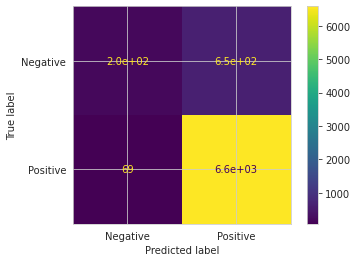

In [ ]:
display_score(rf)

Fitting a Random Forest classifier with various hyperparameters

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid={
    'max_depth': [15,20],
    'min_samples_leaf': [100,200],
    'min_samples_split':[200,400],
    'n_estimators':[100,300]
}
#create a basic model
final_rf=RandomForestClassifier()
#Instantiate the grid search model
rf_tuned=GridSearchCV(estimator=final_rf,param_grid=param_grid,scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)
rf_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# print best hyperparameters
print("Best AUC-ROC score on train data : ", rf_tuned.best_score_)
print("Best hyperparameters : ",rf_tuned.best_params_)

Best AUC-ROC score on train data :  0.8695415809023505
Best hyperparameters :  {'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


Displaying Confusion matrix Scores

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

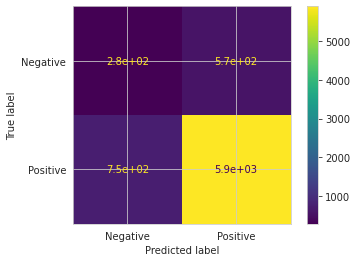

In [ ]:
#Test data performance metrics
display_score(rf_tuned)

##**Model 4 - XGBoost Classifier**

Fitting a XGBoost classifier without any hyperparameter tuning

In [ ]:
from xgboost import XGBClassifier

In [ ]:
final_xgb=XGBClassifier(booster='gbtree')
final_xgb.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Displaying Confusion matrix Scores

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Accuracy is  0.8313333333333334
Sensitivity is 0.8565197774101369
Specificity is 0.6345475910693302


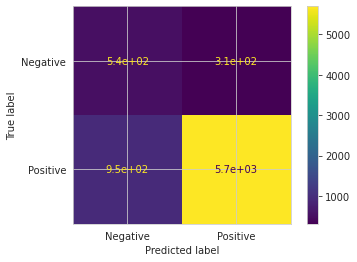

In [ ]:
#Test data performance metrics
display_score(final_xgb)

Fitting a XGBoost classifier with various custom hyperparameters.

In [ ]:
param_grid={'learning_rate':[0.001,0.01], 'max_depth':[5,10], 'n_estimator':[100,300]}

final_xgb=XGBClassifier(booster='gbtree')
#set up GridSearchCV()
xgb_tuned=GridSearchCV(estimator=final_xgb,
                       param_grid=param_grid,
                       scoring='roc_auc',
                       cv=3,
                       verbose=1,
                       return_train_score=True)
xgb_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 43.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [5, 10],
                         'n_estimator': [100, 300]},
             pre_dispatch='2*n_jobs', refit=T

In [ ]:
#print best hyperparameter
print("Best ROC-AUC score on train data : ",xgb_tuned.best_score_)
print("Best hyperparameter : ",xgb_tuned.best_params_)

Best ROC-AUC score on train data :  0.9167706918555996
Best hyperparameter :  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimator': 100}


Displaying Confusion matrix Scores

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [5, 10],
                         'n_estimator': [100, 300]},
             pre_dispatch='2*n_jobs', refit=T

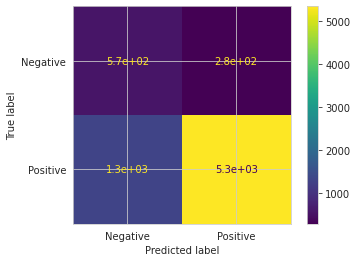

In [ ]:
# Test data performance metrics
display_score(xgb_tuned)

##Summary of the models

In [ ]:
results={('LR'):[0.83, 0.84, 0.76], ('NB'):[0.86, 0.89, 0.61], ('RF'):[0.90, 0.99, 0.20], ('RF Tuned'):[0.82, 0.87, 0.36],
 ('XGB'):[0.84, 0.87, 0.60], ('XGB Tuned'):[0.79, 0.82, 0.62]}
pd.DataFrame(results, index=['Accuracy','Sensitivity','Specificity'])

LR    NB    RF  RF Tuned   XGB  XGB Tuned
Accuracy     0.83  0.86  0.90      0.82  0.84       0.79
Sensitivity  0.84  0.89  0.99      0.87  0.87       0.82
Specificity  0.76  0.61  0.20      0.36  0.60       0.62

In [ ]:
#Save the best model as pickle 
saved_model=pickle.dump(final_lr,open('/content/gdrive/MyDrive/Capstone/logistic_regression.pkl','wb'))

##Recommendation System Notebook
User based recommendation
User based prediction & evaluation
Item based recommendation
Item based prediction & evaluation
We will try both user based and item based recommendation and select the one giving less rmse.

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
prod_data.head(3)

id            brand  ... reviews_username user_sentiment
0  AV13O1A8GV-KLJ3akUyj  Universal Music  ...           joshua       Positive
1  AV14LG0R-jtxr-f38QfS         Lundberg  ...        dorothy w       Positive
2  AV14LG0R-jtxr-f38QfS         Lundberg  ...        dorothy w       Positive

[3 rows x 15 columns]

In [ ]:
rating_recomm=prod_data[['id','reviews_rating','reviews_username']]
rating_recomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   reviews_rating    30000 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [ ]:
rating_recomm=rating_recomm[~rating_recomm['reviews_username'].isna()]
rating_recomm.columns=['productId','rating','user']
rating_recomm.head()

productId  rating       user
0  AV13O1A8GV-KLJ3akUyj       5     joshua
1  AV14LG0R-jtxr-f38QfS       5  dorothy w
2  AV14LG0R-jtxr-f38QfS       5  dorothy w
3  AV16khLE-jtxr-f38VFn       1    rebecca
4  AV16khLE-jtxr-f38VFn       1  walker557

Dividing the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(rating_recomm,test_size=0.30,random_state=31)

In [ ]:
print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [ ]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot=train.pivot_table(
    index='user',
    columns='productId',
    values='rating').fillna(0)

df_pivot.head()

productId    AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                               ...                      
00sab00                       0.0  ...                   0.0
01impala                      0.0  ...                   0.0
02dakota                      0.0  ...                   0.0
02deuce                       0.0  ...                   0.0
06stidriver                   0.0  ...                   0.0

[5 rows x 255 columns]

#Creating dummy train & dummy test dataset
These dataset will be used for prediction

Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [ ]:
dummy_train.head()

productId  rating       user
5704   AVpf2tw1ilAPnD_xjflC       4       dwof
12549  AVpf3VOfilAPnD_xjpun       5   josie225
8534   AVpf3VOfilAPnD_xjpun       5    mellin1
5671   AVpf2tw1ilAPnD_xjflC       4  jerry64gd
21698  AVpfm8yiLJeJML43AYyu       1     augale

In [ ]:
# The products not rated by user is marked as 1 for prediction.
dummy_train['rating']=dummy_train['rating'].apply(lambda x:0 if x>=1 else 1)

In [ ]:
#convert the dummy train dataset into matrix format
dummy_train=dummy_train.pivot_table(
    index='user',
    columns='productId',
    values='rating').fillna(1)

In [ ]:
dummy_train.head()

productId    AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                               ...                      
00sab00                       1.0  ...                   1.0
01impala                      1.0  ...                   1.0
02dakota                      1.0  ...                   1.0
02deuce                       1.0  ...                   1.0
06stidriver                   1.0  ...                   1.0

[5 rows x 255 columns]

####Cosine Similarity

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

####Adjusted Cosine

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.

##User Similarity Matrix
###Using Cosine Similarity

In [ ]:
df_pivot.nunique()

productId
AV13O1A8GV-KLJ3akUyj    2
AV14LG0R-jtxr-f38QfS    2
AV16khLE-jtxr-f38VFn    5
AV1YGDqsGV-KLJ3adc-O    6
AV1YIch7GV-KLJ3addeG    2
                       ..
AVpfshNsLJeJML43CB8q    2
AVpfthSailAPnD_xg3ON    4
AVpftikC1cnluZ0-p31V    6
AVpfv4TlilAPnD_xhjNS    3
AVpfvieo1cnluZ0-qdnu    4
Length: 255, dtype: int64

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation=1-pairwise_distances(df_pivot,metric='cosine')
user_correlation[np.isnan(user_correlation)]=0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [ ]:
user_correlation.shape

(18212, 18212)

##Using adjusted Cosine
####Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [ ]:
#Creating a user-product matrix
df_pivot=train.pivot_table(
    index='user',
    columns='productId',
    values='rating')

In [ ]:
df_pivot.head()

productId    AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                               ...                      
00sab00                       NaN  ...                   NaN
01impala                      NaN  ...                   NaN
02dakota                      NaN  ...                   NaN
02deuce                       NaN  ...                   NaN
06stidriver                   NaN  ...                   NaN

[5 rows x 255 columns]

Normalising the rating of the products for each user around 0 mean

In [ ]:
mean=np.nanmean(df_pivot,axis=1)
df_substracted=(df_pivot.T - mean).T

In [ ]:
df_substracted.head()

productId    AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                               ...                      
00sab00                       NaN  ...                   NaN
01impala                      NaN  ...                   NaN
02dakota                      NaN  ...                   NaN
02deuce                       NaN  ...                   NaN
06stidriver                   NaN  ...                   NaN

[5 rows x 255 columns]

Finding cosine similarity

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation=1 - pairwise_distances(df_substracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)]=0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
user_correlation.shape

(18212, 18212)

##Prediction - User User
Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [ ]:
user_predicted_ratings=np.dot(user_correlation,df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 1.55829543, 3.20256308,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
user_predicted_ratings.shape

(18212, 255)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [ ]:
dummy_train.shape

(18212, 255)

In [ ]:
user_final_ratings=np.multiply(user_predicted_ratings,dummy_train)
user_final_ratings

productId    AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                               ...                      
00sab00                       0.0  ...                   0.0
01impala                      0.0  ...                   0.0
02dakota                      0.0  ...                   0.0
02deuce                       0.0  ...                   0.0
06stidriver                   0.0  ...                   0.0
...                           ...  ...                   ...
zuttle                        0.0  ...                   0.0
zwithanx                      0.0  ...                   0.0
zxcsdfd                       0.0  ...                   0.0
zyiah4                        0.0  ...                   0.0
zzz1127                       0.0  ...                   0.0

[18212 rows x 255 columns]

####Finding the top 20 recommendation for the user

In [ ]:
# Take the user ID as input.
user_input=input("Enter your username: ")
print(user_input)

Enter your username: 00sab00
00sab00


In [ ]:
predct_output=user_final_ratings.loc[user_input].sort_values(ascending=False)[:20]
predct_output

productId
AVpfPaoqLJeJML435Xk9    59.497748
AVpfRTh1ilAPnD_xYic2    35.729246
AVpf0eb2LJeJML43EVSt    30.742364
AVpf2tw1ilAPnD_xjflC    14.335169
AVpf3VOfilAPnD_xjpun    13.632461
AVpfBrUZilAPnD_xTUly     9.001445
AVpfR5m0LJeJML436K3W     8.855751
AV1YGDqsGV-KLJ3adc-O     6.059436
AVpfOIrkilAPnD_xXgDG     5.859790
AVpe8gsILJeJML43y6Ed     5.789666
Name: 00sab00, dtype: float64

In [ ]:
# Save the best trained model as a pickle string.
saved_model = pickle.dump(user_final_ratings, open('/content/gdrive/MyDrive/Capstone/user_user_prediction_model.pkl', 'wb'))

###Evaluation - User User

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the products already rated by the user insead of predicting it for the products not rated by the user.

In [ ]:
#find out the common users of train and test datasets
common_users=test[test['user'].isin(train['user'])]
common_users

productId  rating         user
21169  AVpfm8yiLJeJML43AYyu       1         jjjj
8538   AVpf3VOfilAPnD_xjpun       5      jygibri
18735  AVpfJP1C1cnluZ0-e3Xy       4        jel08
22417  AVpfOmKwLJeJML435GM7       1      elena79
19297  AVpfJP1C1cnluZ0-e3Xy       5         angc
...                     ...     ...          ...
18575  AVpfJP1C1cnluZ0-e3Xy       1        ash23
28972  AVpfW8y_LJeJML437ySW       3     oats4mer
21847  AVpfMpZ51cnluZ0-f_L9       3       dennis
8911   AVpf3VOfilAPnD_xjpun       5  sweetpea626
12970  AVpf3VOfilAPnD_xjpun       5         sam1

[1976 rows x 3 columns]

In [ ]:
#convert into user product matrix
common_user_based_matrix=common_users.pivot_table(index='user',columns='productId',values='rating')
common_user_based_matrix

productId   AV16khLE-jtxr-f38VFn  ...  AVpfvieo1cnluZ0-qdnu
user                              ...                      
1234                         NaN  ...                   NaN
123charlie                   NaN  ...                   NaN
37f5p                        NaN  ...                   NaN
4cloroxl                     NaN  ...                   NaN
50cal                        NaN  ...                   NaN
...                          ...  ...                   ...
zburt5                       NaN  ...                   NaN
zebras                       NaN  ...                   NaN
zippy                        NaN  ...                   NaN
zitro                        NaN  ...                   NaN
zxcsdfd                      NaN  ...                   NaN

[1660 rows x 127 columns]

In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df=pd.DataFrame(user_correlation)
user_correlation_df.head()

0      1      2      3      4      ...  18207  18208  18209  18210  18211
0    1.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
4    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0

[5 rows x 18212 columns]

In [ ]:
df_substracted.head()

productId    AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                               ...                      
00sab00                       NaN  ...                   NaN
01impala                      NaN  ...                   NaN
02dakota                      NaN  ...                   NaN
02deuce                       NaN  ...                   NaN
06stidriver                   NaN  ...                   NaN

[5 rows x 255 columns]

In [ ]:
user_correlation_df['user']=df_substracted.index
user_correlation_df.set_index('user',inplace=True)
user_correlation_df.head()

0      1      2      3      ...  18208  18209  18210  18211
user                                     ...                            
00sab00        1.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
01impala       0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
02dakota       0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
02deuce        0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0
06stidriver    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0

[5 rows x 18212 columns]

In [ ]:
common_users.head()

productId  rating     user
21169  AVpfm8yiLJeJML43AYyu       1     jjjj
8538   AVpf3VOfilAPnD_xjpun       5  jygibri
18735  AVpfJP1C1cnluZ0-e3Xy       4    jel08
22417  AVpfOmKwLJeJML435GM7       1  elena79
19297  AVpfJP1C1cnluZ0-e3Xy       5     angc

In [ ]:
list_name=common_users['user'].tolist()

user_correlation_df.columns=df_substracted.index.tolist()
user_correlation_df2=user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
user_correlation_df2.head()

00sab00  01impala  02dakota  ...  zxcsdfd  zyiah4  zzz1127
user                                     ...                          
1234            0.0       0.0       0.0  ...      0.0     0.0      0.0
123charlie      0.0       0.0       0.0  ...      0.0     0.0      0.0
37f5p           0.0       0.0       0.0  ...      0.0     0.0      0.0
4cloroxl        0.0       0.0       0.0  ...      0.0     0.0      0.0
50cal           0.0       0.0       0.0  ...      0.0     0.0      0.0

[5 rows x 18212 columns]

In [ ]:
user_correlation_df2.shape

(1660, 18212)

In [ ]:
user_correlation_df3=user_correlation_df2.T[user_correlation_df2.T.index.isin(list_name)]

In [ ]:
user_correlation_df4=user_correlation_df3.T

In [ ]:
user_correlation_df4.head()

1234  123charlie  37f5p  4cloroxl  ...  zebras  zippy  zitro  zxcsdfd
user                                           ...                               
1234         1.0         0.0    0.0       0.0  ...     0.0    0.0    0.0      0.0
123charlie   0.0         0.0    0.0       0.0  ...     0.0    0.0    0.0      0.0
37f5p        0.0         0.0    0.0       0.0  ...     0.0    0.0    0.0      0.0
4cloroxl     0.0         0.0    0.0       0.0  ...     0.0    0.0    0.0      0.0
50cal        0.0         0.0    0.0       0.0  ...     0.0    0.0    0.0      0.0

[5 rows x 1660 columns]

In [ ]:
user_correlation_df.shape

(18212, 18212)

In [ ]:
user_correlation_df4[user_correlation_df4<0]=0

common_user_predicted_ratings=np.dot(user_correlation_df4,common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.28867513, 0.        , 0.        , ..., 2.5423759 , 1.44337567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
dummy_test=common_users.copy()
dummy_test['rating']=dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test=dummy_test.pivot_table(index='user',columns='productId',values='rating').fillna(0)

In [ ]:
dummy_test.shape

(1660, 127)

In [ ]:
common_user_based_matrix.head()

productId   AV16khLE-jtxr-f38VFn  ...  AVpfvieo1cnluZ0-qdnu
user                              ...                      
1234                         NaN  ...                   NaN
123charlie                   NaN  ...                   NaN
37f5p                        NaN  ...                   NaN
4cloroxl                     NaN  ...                   NaN
50cal                        NaN  ...                   NaN

[5 rows x 127 columns]

In [ ]:
dummy_test.head()

productId   AV16khLE-jtxr-f38VFn  ...  AVpfvieo1cnluZ0-qdnu
user                              ...                      
1234                         0.0  ...                   0.0
123charlie                   0.0  ...                   0.0
37f5p                        0.0  ...                   0.0
4cloroxl                     0.0  ...                   0.0
50cal                        0.0  ...                   0.0

[5 rows x 127 columns]

In [ ]:

common_user_predicted_ratings=np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
common_user_predicted_ratings.head()

productId   AV16khLE-jtxr-f38VFn  ...  AVpfvieo1cnluZ0-qdnu
user                              ...                      
1234                         0.0  ...                   0.0
123charlie                   0.0  ...                   0.0
37f5p                        0.0  ...                   0.0
4cloroxl                     0.0  ...                   0.0
50cal                        0.0  ...                   0.0

[5 rows x 127 columns]

Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

In [ ]:
X=common_user_predicted_ratings.copy()

In [ ]:
X=X[X>0]
scaler=MinMaxScaler(feature_range=(1,5))
print(scaler.fit(X))
y=scaler.transform(X)
print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
common_=common_users.pivot_table(index='user',columns='productId',values='rating')

In [ ]:
#finding total Non-Nan values
total_non_nan=np.count_nonzero(~np.isnan(y))
total_non_nan

316

In [ ]:
rmse=(sum(sum((common_ - y)**2))/total_non_nan)**0.5
print(rmse)

2.4124916499091618


##Using Item similarity
####Item Based Similarity
Taking the transpose of the rating matrix to normalize the rating around the mean for different products ID. In the user based similarity, we had taken mean for each user instead of each products.

In [ ]:
df_pivot=train.pivot_table(index='user',columns='productId',values='rating').T
df_pivot.head()

user                  00sab00  01impala  02dakota  ...  zxcsdfd  zyiah4  zzz1127
productId                                          ...                          
AV13O1A8GV-KLJ3akUyj      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV14LG0R-jtxr-f38QfS      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV16khLE-jtxr-f38VFn      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV1YGDqsGV-KLJ3adc-O      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV1YIch7GV-KLJ3addeG      NaN       NaN       NaN  ...      NaN     NaN      NaN

[5 rows x 18212 columns]


Normalising the products rating for each products for using the Adujsted Cosine

In [ ]:
mean=np.nanmean(df_pivot,axis=1)
df_substracted=(df_pivot.T - mean).T

In [ ]:
df_substracted.head()

user                  00sab00  01impala  02dakota  ...  zxcsdfd  zyiah4  zzz1127
productId                                          ...                          
AV13O1A8GV-KLJ3akUyj      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV14LG0R-jtxr-f38QfS      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV16khLE-jtxr-f38VFn      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV1YGDqsGV-KLJ3adc-O      NaN       NaN       NaN  ...      NaN     NaN      NaN
AV1YIch7GV-KLJ3addeG      NaN       NaN       NaN  ...      NaN     NaN      NaN

[5 rows x 18212 columns]

Finding the cosine similarity using pairwise distances approach

In [ ]:
# Item Similarity Matrix
item_correlation= 1 - pairwise_distances(df_substracted.fillna(0),metric='cosine')
item_correlation[np.isnan(item_correlation)]=0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
item_correlation.shape

(255, 255)

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

##Prediction - Item Item

In [ ]:
item_predicted_ratings=np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00600224, 0.06201728,
        0.        ],
       [0.        , 0.        , 0.01254045, ..., 0.00108461, 0.        ,
        0.        ],
       [0.        , 0.        , 0.02090075, ..., 0.00180769, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00515466]])

In [ ]:
item_predicted_ratings.shape

(18212, 255)

In [ ]:
dummy_train.shape

(18212, 255)

###Filtering the rating only for the products not rated by the user for recommendation

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

productId    AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                               ...                      
00sab00                       0.0  ...              0.000000
01impala                      0.0  ...              0.000000
02dakota                      0.0  ...              0.000000
02deuce                       0.0  ...              0.000000
06stidriver                   0.0  ...              0.006443

[5 rows x 255 columns]


Finding the top 20 recommendation for the user

In [ ]:
# Take the user ID as input
user_input = input("Enter your user name : ")
print(user_input)

Enter your user name : 00sab00
00sab00


In [ ]:
predct_output=item_final_rating.loc[user_input].sort_values(ascending=False)[:20]
predct_output

productId
AVpfE7puilAPnD_xUcCW    0.158656
AVpfRoqcLJeJML436FqG    0.133356
AVpfPnrU1cnluZ0-g9rL    0.086135
AVpfJcHuLJeJML433ZrY    0.080092
AVpe6PCDLJeJML43yFQH    0.062017
AVpfv4TlilAPnD_xhjNS    0.062017
AVpfNc9cLJeJML434tza    0.058509
AVpe7sl91cnluZ0-aI1Y    0.045737
AVpf5ujMilAPnD_xkQVi    0.041633
AVpe_dxlilAPnD_xSiHI    0.034111
Name: 00sab00, dtype: float64

In [ ]:
# Save the best trained model as a pickle string.
saved_model = pickle.dump(user_final_ratings, open('/content/gdrive/MyDrive/Capstone/item_item_prediction_model.pkl', 'wb'))

##Evaluation - Item Item
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the products already rated by the user insead of predicting it for the products not rated by the user.

In [ ]:
#find out the common product of train and test datasets
common_product=test[test['productId'].isin(train['productId'])]
common_product.shape

(8964, 3)

(8964, 3)

In [ ]:
common_product.head()

productId  rating             user
21384  AVpfm8yiLJeJML43AYyu       1           curlyd
14483  AVpf3VOfilAPnD_xjpun       5             prip
21169  AVpfm8yiLJeJML43AYyu       1             jjjj
25411  AVpfPaoqLJeJML435Xk9       5  internetfreak69
20351  AVpfJP1C1cnluZ0-e3Xy       5           hb6851

In [ ]:
common_item_based_matrix=common_product.pivot_table(
    index='user',
    columns='productId',
    values='rating').T

common_item_based_matrix.shape

(203, 8348)

In [ ]:
item_correlation_df=pd.DataFrame(item_correlation)
item_correlation_df.head()

0    1    2    3    4    5    6    ...  248  249  250  251       252  253  254
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.000000  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.001989  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.000000  0.0  0.0

[5 rows x 255 columns]

In [ ]:
item_correlation_df['productId']=df_substracted.index
item_correlation_df.set_index('productId',inplace=True)
item_correlation_df.head()

AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
productId                                   ...                      
AV13O1A8GV-KLJ3akUyj                   0.0  ...                   0.0
AV14LG0R-jtxr-f38QfS                   0.0  ...                   0.0
AV16khLE-jtxr-f38VFn                   0.0  ...                   0.0
AV1YGDqsGV-KLJ3adc-O                   0.0  ...                   0.0
AV1YIch7GV-KLJ3addeG                   0.0  ...                   0.0

[5 rows x 255 columns]

In [ ]:
list_name=common_product['productId'].tolist()

In [ ]:
item_correlation_df.columns=df_substracted.index.tolist()

item_correlation_df2=item_correlation_df[item_correlation_df.index.isin(list_name)]

In [ ]:
item_correlation_df3=item_correlation_df2.T[item_correlation_df2.T.index.isin(list_name)]

item_correlation_df4=item_correlation_df3.T

In [ ]:
item_correlation_df4.head()

AV16khLE-jtxr-f38VFn  ...  AVpfvieo1cnluZ0-qdnu
productId                                   ...                      
AV16khLE-jtxr-f38VFn                   1.0  ...                   0.0
AV1YGDqsGV-KLJ3adc-O                   0.0  ...                   0.0
AV1YlENIglJLPUi8IHsX                   0.0  ...                   0.0
AV1YmBrdGV-KLJ3adewb                   0.0  ...                   0.0
AV1YmDL9vKc47QAVgr7_                   0.0  ...                   0.0

[5 rows x 203 columns]

In [ ]:
item_correlation_df4[item_correlation_df4<0]=0

common_item_predicted_ratings=np.dot(item_correlation_df4,common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02105944, 0.00045358, 0.00036287, ..., 0.00045358, 0.00018143,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00733409],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10336214],
       [0.        , 0.00644332, 0.00515466, ..., 0.00644332, 0.00257733,
        0.        ]])

In [ ]:
common_item_predicted_ratings.shape

(203, 8348)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [ ]:
dummy_test=common_product.copy()

dummy_test['rating']=dummy_test['rating'].apply(lambda x:1 if x>=1 else 0)
dummy_test=dummy_test.pivot_table(index='user',columns='productId',values='rating').T.fillna(0)
common_item_predicted_ratings=np.multiply(common_item_predicted_ratings, dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [ ]:
common_=common_product.pivot_table(index='user',columns='productId',values='rating').T

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

In [ ]:
X=common_item_predicted_ratings.copy()

In [ ]:
X=X[X>0]
scaler=MinMaxScaler(feature_range=(1,5))
print(scaler.fit(X))
y=scaler.transform(X)
print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
# Finding total non-NaN value
total_non_nan=np.count_nonzero(~np.isnan(y))

In [ ]:
rmse=(sum(sum((common_ - y)**2))/total_non_nan)**0.5
print(rmse)

3.5762571957798124


##Summary - Recommendation Engine
RMSE of user based model is less than item based model, so we will use user based model in further processing

###**Using the same code we used above to save the user final rating dataframe to pickle file for complete data**

In [ ]:
# Pivot the dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = rating_recomm.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(0)

df_pivot.head(3)

productId  AV13O1A8GV-KLJ3akUyj  ...  AVpfvieo1cnluZ0-qdnu
user                             ...                      
00dog3                      0.0  ...                   0.0
00sab00                     0.0  ...                   0.0
01impala                    0.0  ...                   0.0

[3 rows x 271 columns]

In [ ]:
df_pivot.shape

(24914, 271)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
# Copy the train dataset into dummy_train
dummy_train = rating_recomm.copy()

# The products not rated by user is marked as 1 for prediction. 
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='user',
    columns='productId',
    values='rating'
).fillna(1)


In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0

In [ ]:
# Create a user-product matrix.
df_pivot = rating_recomm.pivot_table(
    index='user',
    columns='productId',
    values='rating'
)

In [ ]:
mean = np.nanmean(df_pivot, axis=1)

In [ ]:
df_subtracted = (df_pivot.T-mean).T

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')

In [ ]:
user_correlation[np.isnan(user_correlation)] = 0

In [ ]:
user_correlation[user_correlation<0]=0
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))


In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)

In [ ]:
# Saving the data
import pickle
pickle.dump(user_final_rating.astype('float32'), open('/content/gdrive/MyDrive/Capstone/user_final_rating.pkl', 'wb'))

Finding the top 20 recommendation for the user

In [ ]:
# Take the user ID as input.
user_input = input("Enter your user name ")
print(user_input)

Enter your user name 00sab00
00sab00


In [ ]:
#providing predictions for the user
predct_output = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
predct_output

productId
AVpfPaoqLJeJML435Xk9    73.261375
AVpfRTh1ilAPnD_xYic2    52.715813
AVpf0eb2LJeJML43EVSt    31.589842
AVpf2tw1ilAPnD_xjflC    19.778862
AVpf3VOfilAPnD_xjpun    14.880849
AVpfR5m0LJeJML436K3W    11.135952
AVpfM_ytilAPnD_xXIJb    10.347675
AVpfBrUZilAPnD_xTUly     8.590609
AVpfJP1C1cnluZ0-e3Xy     8.570136
AVpe8gsILJeJML43y6Ed     7.462148
Name: 00sab00, dtype: float64